In [1]:
#import all library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df_ipl = pd.read_excel('data/ipl_auction.xls',header=1)
df_ipl.head()

,Team,Player,Role,Price-Paid,Previous-Team,Base-Price,RTM,Foreign,Country
0,CSK,Faf du Plessis,Batsman,16000000,RPS,15000000,1,1,SA
1,CSK,Harbhajan Singh,Bowler,20000000,MI,20000000,0,0,IND
2,CSK,Dwayne Bravo,All-Rounder,64000000,GL,20000000,1,1,WI
3,CSK,Shane Watson,All-Rounder,40000000,RCB,10000000,0,1,AUS
4,CSK,Kedar Jadhav,Batsman,78000000,DD,20000000,0,0,IND


In [3]:
for lab, row in df_ipl.iterrows() :
    df_ipl['price_increase'] = round(((df_ipl['Price-Paid']-df_ipl['Base-Price'])/df_ipl['Base-Price'])*100,1)


In [4]:
#Creating individual DF for each teams
df_ipl_csk = df_ipl[df_ipl['Team']=='CSK']
df_ipl_srh = df_ipl[df_ipl['Team']=='SRH']
df_ipl_mi = df_ipl[df_ipl['Team']=='MI']
df_ipl_rr = df_ipl[df_ipl['Team']=='RR']
df_ipl_dd = df_ipl[df_ipl['Team']=='DD']
df_ipl_kxip = df_ipl[df_ipl['Team']=='KXIP']
df_ipl_rcb = df_ipl[df_ipl['Team']=='RCB']
df_ipl_kkr = df_ipl[df_ipl['Team']=='KKR']

In [12]:
df_ipl_csk_base = df_ipl_csk[df_ipl_csk['Price-Paid']==df_ipl_csk['Base-Price']]
df_ipl_csk_base

,Team,Player,Role,Price-Paid,Previous-Team,Base-Price,RTM,Foreign,Country,price_increase
1,CSK,Harbhajan Singh,Bowler,20000000,MI,20000000,0,0,IND,0.0
6,CSK,Imran Tahir,Bowler,10000000,RPS,10000000,0,1,SA,0.0
9,CSK,J Narayan,Wicket Keeper,2000000,NaN,2000000,0,0,IND,0.0
10,CSK,Mitchell Santner,All-Rounder,5000000,NaN,5000000,0,1,NZ,0.0
13,CSK,Lungi Ngidi,Bowler,5000000,NaN,5000000,0,1,SA,0.0
14,CSK,Kanishk Seth,All-Rounder,2000000,NaN,2000000,0,0,IND,0.0
15,CSK,Dhruv Shorey,All-Rounder,2000000,NaN,2000000,0,0,IND,0.0
16,CSK,Murali Vijay,Batsman,20000000,KXIP,20000000,0,0,IND,0.0
17,CSK,Sam Billings,Batsman,10000000,DD,10000000,0,1,ENG,0.0
18,CSK,Mark Wood,Bowler,15000000,NaN,15000000,0,1,ENG,0.0


In [6]:
df_ipl_price_sort = df_ipl.sort_values(by='price_increase',ascending=False)[:30]
writer = pd.ExcelWriter('df_ipl_top_per.xlsx')
df_ipl_price_sort.to_excel(writer,'Sheet1')
writer.save()

In [7]:
member = ((np.asarray(df_ipl_price_sort['Player'])).reshape(6,5))
perchange = ((np.asarray(round(df_ipl_price_sort['price_increase'],0))).reshape(6,5))

In [8]:
df_ipl_sorted = pd.read_excel('data/df_ipl_top_per.xls',header=0)
result = df_ipl_sorted.pivot(index = 'Y',columns = 'X',values = 'price_increase')
print(result)

X       1       2       3      4      5
Y                                      
1  3000.0  1500.0  1166.7  850.0  700.0
2  2100.0  1450.0  1020.0  800.0  666.7
3  1900.0  1400.0  1000.0  800.0  620.0
4  1700.0  1400.0  1000.0  700.0  600.0
5  1600.0  1400.0   966.7  700.0  525.0
6  1600.0  1400.0   900.0  700.0  500.0


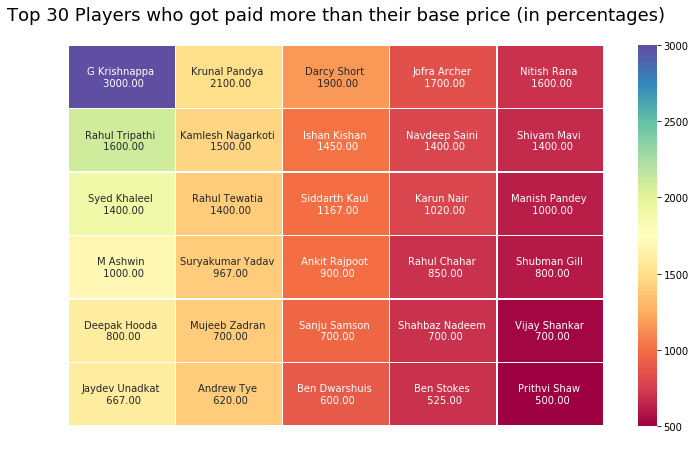

In [9]:
labels = (np.asarray(["{0} \n {1:.2f}".format(member,value)
                      for member,value in zip(member.flatten(),
                                            perchange.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 Players who got paid more than their base price (in percentages)'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.xlabel('Sex')
plt.ylabel('DACA Recipients')
plt.show()


In [10]:
df_ipl_foreign = df_ipl[df_ipl['Country']!='IND']
df_ipl_indian = df_ipl[df_ipl['Country']=='IND']
df_ipl_indian.loc[df_ipl_indian['Price-Paid'].idxmax()]
df_ipl_foreign.loc[df_ipl_foreign['Price-Paid'].idxmax()]

Team                       RR
Player             Ben Stokes
Role              All-Rounder
Price-Paid          125000000
Previous-Team             RPS
Base-Price           20000000
RTM                         0
Foreign                     1
Country                   ENG
price_increase            525
Name: 124, dtype: object

In [52]:
df_ipl_country_sort

,Country,Team
1,AUS,16
3,ENG,9
7,SA,9
6,NZ,7
9,WI,6
0,AFG,3
2,BNG,2
8,SL,2
5,NP,1


In [141]:
df_ipl_country_sort

,Country,Team
1,AUS,16
3,ENG,9
7,SA,9
6,NZ,7
9,WI,6
0,AFG,3
2,BNG,2
8,SL,2
5,NP,1


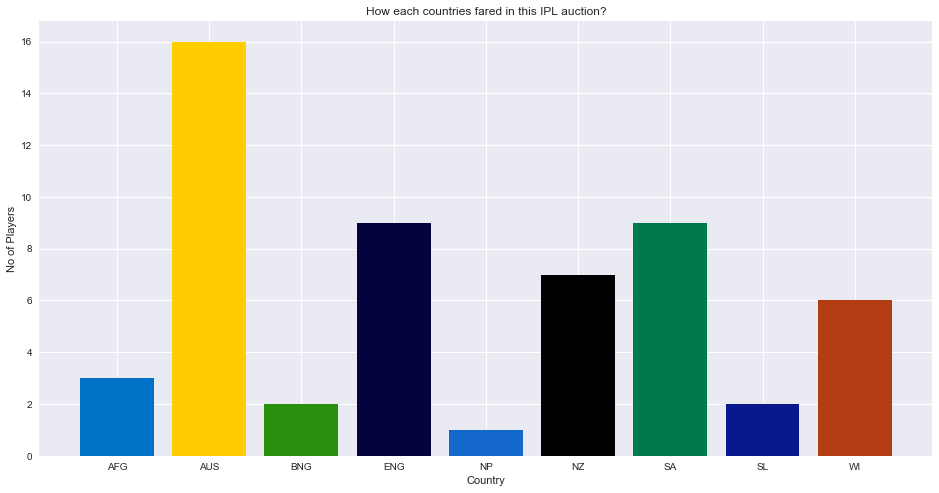

In [205]:
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_country = df_ipl.groupby('Country', as_index=False).agg({"Team": "count"})
plt.figure(figsize=(16,8))
df_ipl_country_sort = df_country.sort_values(by='Team',ascending=False)[1:11]
plt.bar(df_ipl_country_sort['Country'],df_ipl_country_sort['Team'],color=('#FFCD00','#04033D','#007A4D','#000003','#B23D12','#0072c6','#2A910F','#08198E','#1468CC'),label='No of Players')
plt.xlabel('Country')
plt.ylabel('No of Players')
plt.title('How each countries fared in this IPL auction?')
plt.show()

In [160]:
df_pivot = df_ipl.pivot_table('Base-Price',index='Team',columns=['Country'],aggfunc='count')
df_pivot_result = df_pivot.fillna(0)
df_pivot_result


Country,AFG,AUS,BNG,ENG,IND,NP,NZ,SA,SL,WI
Team,,,,,,,,,,
CSK,0.0,1.0,0.0,2.0,14.0,0.0,1.0,3.0,0.0,1.0
DD,0.0,2.0,0.0,1.0,15.0,1.0,2.0,1.0,0.0,0.0
KKR,0.0,3.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0
KXIP,1.0,4.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,1.0
MI,0.0,2.0,1.0,0.0,14.0,0.0,0.0,2.0,1.0,2.0
RCB,0.0,1.0,0.0,2.0,14.0,0.0,3.0,1.0,0.0,0.0
RR,0.0,2.0,0.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0
SRH,2.0,1.0,1.0,1.0,16.0,0.0,1.0,0.0,0.0,1.0


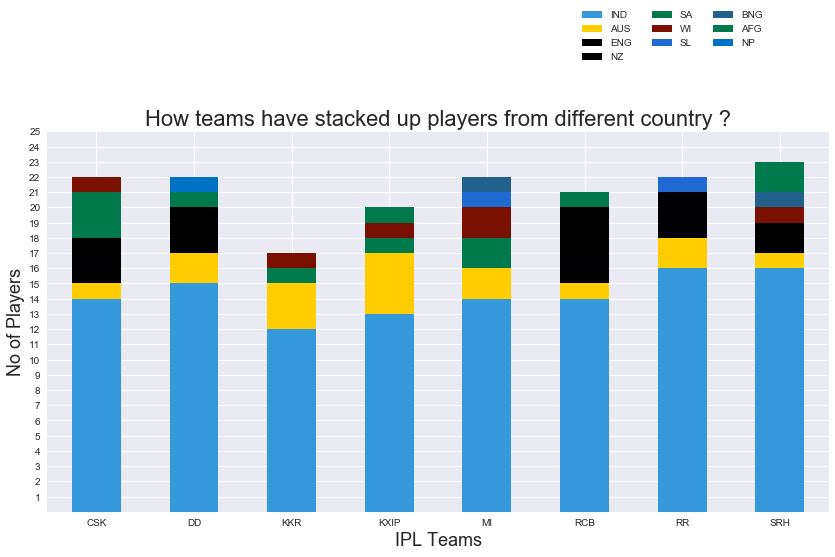

In [260]:
colors = ['#3498DB','#FFCD00','#000003','#000000','#007A4D','#7a1000','#1e6ad2','#21618C','#007A4D','#0072c6']

df_pivot_result.loc[:,['IND','AUS','ENG','NZ','SA', 'WI','SL','BNG','AFG', 'NP']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('How teams have stacked up players from different country ?',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)

In [262]:
df_pivot_role = df_ipl.pivot_table('Base-Price',index='Team',columns=['Role'],aggfunc='count')
df_pivot_roles = df_pivot_role.fillna(0)
df_pivot_roles

Role,All-Rounder,Batsman,Bowler,Wicket Keeper
Team,,,,
CSK,7.0,4.0,9.0,2.0
DD,8.0,5.0,8.0,1.0
KKR,3.0,7.0,5.0,2.0
KXIP,4.0,9.0,7.0,0.0
MI,5.0,6.0,9.0,2.0
RCB,7.0,3.0,9.0,2.0
RR,10.0,3.0,7.0,2.0
SRH,7.0,6.0,8.0,2.0


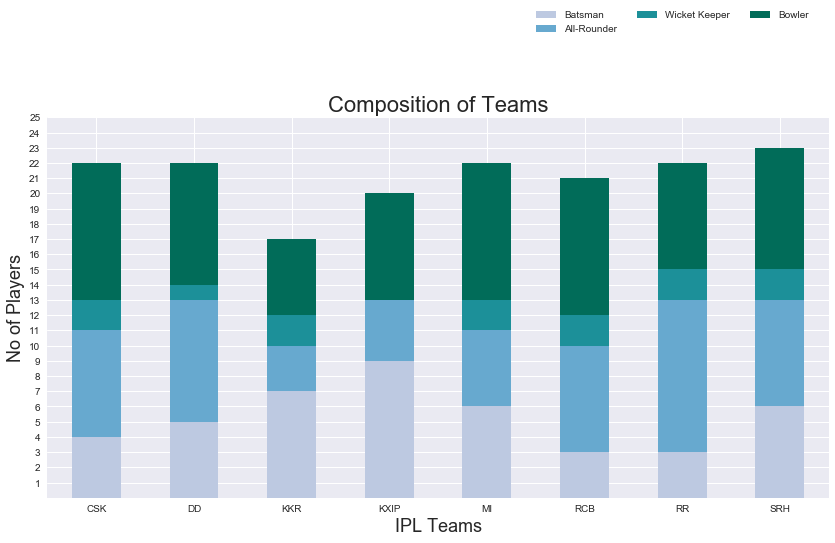

In [266]:
colors = ['#bdc9e1','#67a9cf','#1c9099','#016c59']
df_pivot_roles.loc[:,['Batsman','All-Rounder','Wicket Keeper','Bowler']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('Composition of Teams',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)